In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("nov21-cps.csv")

# Choosing questions that have the keyword 'privacy' in them and have binary responses
privacy_colns = ["prtage", "hepspre1", "hepspre2", "hepspre3", "hepspre4", "hepspre5", "hepscon1", "hepscon2", "hepscon3", "hepscon4", "hepscon5", "hepscon6", "hepscon8", "henohm7"]#, "heprinoh"]

# Original: -1 = blank, 1 = yes, 2 = no
# Adjusted: -1 = no, 0 = blank, 1 = yes
df = df[privacy_colns]
dict_values = {-1:0, 2:-1}
df = df.replace(dict_values)

In [3]:
# Var set is the base questions for all subquestions
var_set = set()

# Gets the base question (e.g. hepspre is a base question of hepspre1) string by removing digits of unique column names and append them to set
for col in privacy_colns:
    non_digit_q = ''.join(c for c in col if not c.isdigit())
    var_set.add(non_digit_q)

# Calculates the sums for each row based on the base question and adds the result as a column to the dataframe
for var in var_set:
    cols_to_sum = [col for col in df.columns if var in col]
    df[f'{var}_sum'] = df.loc[:, cols_to_sum].sum(axis=1)

df


,prtage,hepspre1,hepspre2,hepspre3,hepspre4,hepspre5,hepscon1,hepscon2,hepscon3,hepscon4,hepscon5,hepscon6,hepscon8,henohm7,hepscon_sum,hepspre_sum,henohm_sum,prtage_sum
0,24,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,24
1,28,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,28
2,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,7
3,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,3
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127370,65,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,0,-5,-3,0,65
127371,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
127372,61,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,61
127373,58,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,58


In [4]:
# Calculates the averages for each base question sum
cols_to_avg = [col for col in df.columns if "sum" in col]
for col in cols_to_avg:
    avg = sum(df[col]) / len(df[col])
    display(col + " average: " + str(avg))

'hepscon_sum average: -2.3520392541707555'

'hepspre_sum average: -2.4848125613346417'

'henohm_sum average: -0.11544651619234543'

'prtage_sum average: 33.09064573110893'

In [5]:
df = df[df['prtage'] > 5]
df

,prtage,hepspre1,hepspre2,hepspre3,hepspre4,hepspre5,hepscon1,hepscon2,hepscon3,hepscon4,hepscon5,hepscon6,hepscon8,henohm7,hepscon_sum,hepspre_sum,henohm_sum,prtage_sum
0,24,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,24
1,28,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,28
2,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-7,-5,0,7
5,45,-1,-1,-1,-1,-1,1,1,1,1,-1,-1,-1,0,1,-5,0,45
6,30,1,1,-1,-1,-1,1,1,-1,-1,-1,-1,-1,0,-3,-1,0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127369,73,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,0,-5,-3,0,73
127370,65,1,-1,-1,-1,-1,1,-1,-1,-1,-1,-1,-1,0,-5,-3,0,65
127372,61,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,61
127373,58,0,0,0,0,0,0,0,0,0,0,0,0,-1,0,0,-1,58


In [6]:
df_6_to_17 = df[df['prtage'] < 18]
df_18_to_24 = df.loc[(df['prtage'] > 17) & (df['prtage'] < 24)]
df_25_to_34 = df.loc[(df['prtage'] > 18) & (df['prtage'] < 35)]
df_35_to_44 = df.loc[(df['prtage'] > 34) & (df['prtage'] < 45)]
df_45_to_54 = df.loc[(df['prtage'] > 44) & (df['prtage'] < 55)]
df_55_to_64 = df.loc[(df['prtage'] > 55) & (df['prtage'] < 65)]
df_65 = df[df['prtage'] > 64]

In [7]:
df_6_to_17 = df[df['prtage'] < 18]
df_18_to_44 = df.loc[(df['prtage'] > 17) & (df['prtage'] < 45)]
df_45_to_64 = df.loc[(df['prtage'] > 44) & (df['prtage'] < 65)]
df_65 = df[df['prtage'] > 64]

#<18
#18-44
#45-64
#>64

In [8]:
def computeSum(df):
    # Choosing questions that have the keyword 'privacy' in them and have binary responses
    privacy_colns = ["prtage", "hepspre1", "hepspre2", "hepspre3", "hepspre4", "hepspre5", "hepscon1", "hepscon2", "hepscon3", "hepscon4", "hepscon5", "hepscon6", "hepscon8", "henohm7"]#, "heprinoh"]

    # Original: -1 = blank, 1 = yes, 2 = no
    # Adjusted: -1 = no, 0 = blank, 1 = yes
    df = df[privacy_colns]
    dict_values = {-1:0, 2:0}
    df = df.replace(dict_values)
    # Var set is the base questions for all subquestions
    var_set = set()

    # Gets the base question (e.g. hepspre is a base question of hepspre1) string by removing digits of unique column names and append them to set
    for col in privacy_colns:
        non_digit_q = ''.join(c for c in col if not c.isdigit())
        var_set.add(non_digit_q)

    # Calculates the sums for each row based on the base question and adds the result as a column to the dataframe
    for var in var_set:
        cols_to_sum = [col for col in df.columns if var in col]
        df[f'{var}_sum'] = df.loc[:, cols_to_sum].sum(axis=1)
        
    return df
def computeAvg(df):
    cols_to_avg = [col for col in df.columns if "sum" in col]
    avg_vals = []
    for col in cols_to_avg:
        avg = sum(df[col]) / len(df[col])
        avg_vals.append(avg)
#         display(col + " average: " + str(avg))
    return avg_vals[:3]

In [9]:
df_21y = pd.read_csv("nov21-cps.csv")
df_21y = computeSum(df_21y)

df_19y = pd.read_csv("nov19-cps.csv")
df_19y = computeSum(df_19y)

df_17y = pd.read_csv("nov17-cps.csv")
df_17y = computeSum(df_17y)

In [10]:
# separate demo for df_21y
df21y_6_to_17 = df_21y[df_21y['prtage'] < 18]
df21y_18_to_24 = df_21y.loc[(df_21y['prtage'] > 17) & (df_21y['prtage'] < 24)]
df21y_25_to_34 = df_21y.loc[(df_21y['prtage'] > 18) & (df_21y['prtage'] < 35)]
df21y_35_to_44 = df_21y.loc[(df_21y['prtage'] > 34) & (df_21y['prtage'] < 45)]
df21y_45_to_54 = df_21y.loc[(df_21y['prtage'] > 44) & (df_21y['prtage'] < 55)]
df21y_55_to_64 = df_21y.loc[(df_21y['prtage'] > 55) & (df_21y['prtage'] < 65)]
df21y_65 = df_21y[df_21y['prtage'] > 64]

In [11]:
df21y_6_to_17 = df_21y[df_21y['prtage'] < 18]
df21y_18_to_44 = df_21y.loc[(df_21y['prtage'] > 17) & (df_21y['prtage'] < 45)]
df21y_45_to_64 = df_21y.loc[(df_21y['prtage'] > 44) & (df_21y['prtage'] < 65)]
df21y_65 = df_21y[df_21y['prtage'] > 64]

In [12]:
# separate demo for df_19y
df19y_6_to_17 = df_19y[df_19y['prtage'] < 18]
df19y_18_to_24 = df_19y.loc[(df_19y['prtage'] > 17) & (df_19y['prtage'] < 24)]
df19y_25_to_34 = df_19y.loc[(df_19y['prtage'] > 18) & (df_19y['prtage'] < 35)]
df19y_35_to_44 = df_19y.loc[(df_19y['prtage'] > 34) & (df_19y['prtage'] < 45)]
df19y_45_to_54 = df_19y.loc[(df_19y['prtage'] > 44) & (df_19y['prtage'] < 55)]
df19y_55_to_64 = df_19y.loc[(df_19y['prtage'] > 55) & (df_19y['prtage'] < 65)]
df19y_65 = df_19y[df_19y['prtage'] > 64]

In [14]:
df19y_6_to_17 = df_19y[df_19y['prtage'] < 18]
df19y_18_to_44 = df_19y.loc[(df_19y['prtage'] > 17) & (df_19y['prtage'] < 45)]
df19y_45_to_64 = df_19y.loc[(df_19y['prtage'] > 44) & (df_19y['prtage'] < 65)]
df19y_65 = df_19y[df_19y['prtage'] > 64]

In [15]:
# separate demo for df_17y
df17y_6_to_17 = df_17y[df_17y['prtage'] < 18]
df17y_18_to_24 = df_17y.loc[(df_17y['prtage'] > 17) & (df_17y['prtage'] < 24)]
df17y_25_to_34 = df_17y.loc[(df_17y['prtage'] > 18) & (df_17y['prtage'] < 35)]
df17y_35_to_44 = df_17y.loc[(df_17y['prtage'] > 34) & (df_17y['prtage'] < 45)]
df17y_45_to_54 = df_17y.loc[(df_17y['prtage'] > 44) & (df_17y['prtage'] < 55)]
df17y_55_to_64 = df_17y.loc[(df_17y['prtage'] > 55) & (df_17y['prtage'] < 65)]
df17y_65 = df_17y[df_17y['prtage'] > 64]

In [25]:
df17y_6_to_17 = df_17y[df_17y['prtage'] < 18]
df17y_18_to_44 = df_17y.loc[(df_17y['prtage'] > 17) & (df_17y['prtage'] < 45)]
df17y_45_to_64 = df_17y.loc[(df_17y['prtage'] > 44) & (df_17y['prtage'] < 65)]
df17y_65 = df_17y[df_17y['prtage'] > 64]

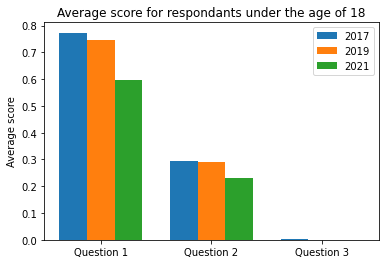

In [26]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_6_to_17), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_6_to_17), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_6_to_17), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants under the age of 18")
plt.legend()

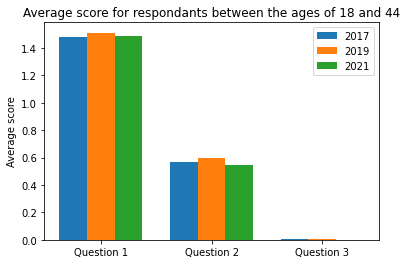

In [27]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_18_to_44), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_18_to_44), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_18_to_44), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants between the ages of 18 and 44")
plt.legend()

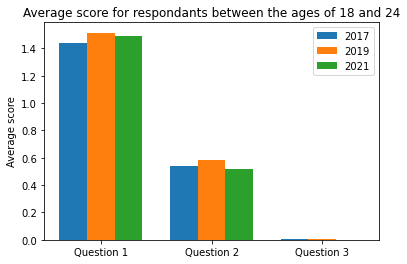

In [28]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_18_to_24), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_18_to_24), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_18_to_24), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants between the ages of 18 and 24")
plt.legend()

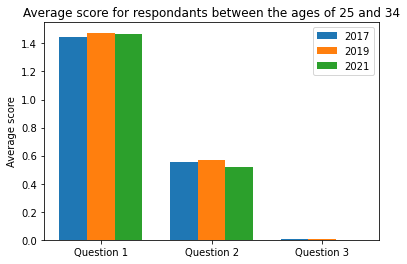

In [29]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_25_to_34), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_25_to_34), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_25_to_34), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants between the ages of 25 and 34")
plt.legend()

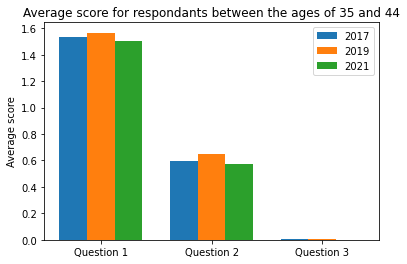

In [30]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_35_to_44), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_35_to_44), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_35_to_44), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants between the ages of 35 and 44")
plt.legend()

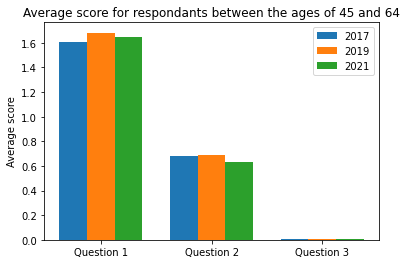

In [31]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_45_to_64), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_45_to_64), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_45_to_64), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants between the ages of 45 and 64")
plt.legend()

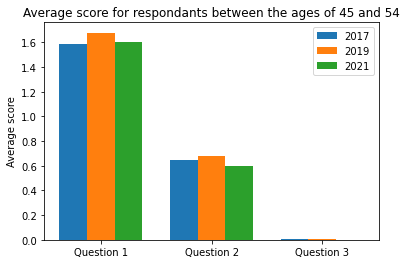

In [32]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_45_to_54), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_45_to_54), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_45_to_54), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants between the ages of 45 and 54")
plt.legend()

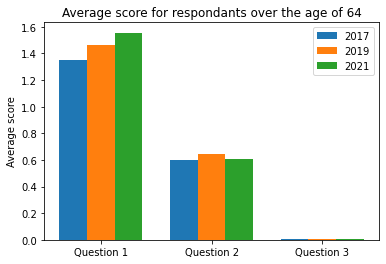

In [33]:
#visualization skeleton

X_values = ['Question 1', 'Question 2', 'Question 3']
x_sep_val = np.arange(3)
x_s_val = [tick + 0.25 for tick in x_sep_val]

plt.bar(x_sep_val, computeAvg(df17y_65), 0.25, label = '2017')
plt.bar(x_sep_val + 0.25, computeAvg(df19y_65), 0.25, label = '2019')
plt.bar(x_sep_val + 0.5, computeAvg(df21y_65), 0.25, label = '2021')

plt.xticks(x_s_val, X_values)
plt.ylabel("Average score")
plt.title("Average score for respondants over the age of 64")
plt.legend()